# General REDCOMETS test
- It can't handle multivariate time series (the ones that got mutliple channels)

In [1]:
import sys, os
sys.path.append(os.path.abspath('..'))

from helpers import *
from Redcomets import REDCOMETS
from aeon.datasets import load_unit_test
from aeon.datasets import load_gunpoint
from aeon.datasets import load_basic_motions

## Unit Test 

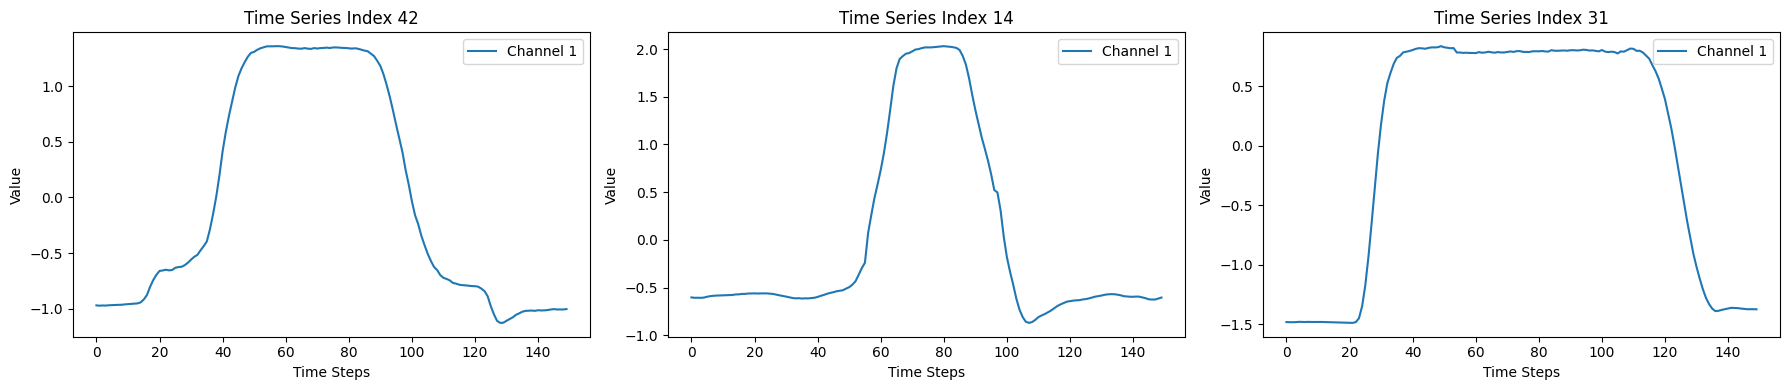

In [2]:
# Load Data
Xtrain, ytrain = load_gunpoint(split="TRAIN")
#Xtrain, ytrain = load_basic_motions(split="TRAIN")
#Xtrain, ytrain = load_unit_test(split="train")


Xtest, ytest = load_gunpoint(split="TEST")
#Xtest, ytest = load_basic_motions(split="TEST")
#Xtest, ytest = load_unit_test(split="test")

#Plot them
plot_random_time_series(Xtrain, n = 3)

In [3]:
clf = REDCOMETS(variant = 3)  
clf.fit(Xtrain, ytrain)  

y_pred = clf.predict(Xtest)  

In [4]:
clf.sax_clfs

[(RandomForestClassifier(n_jobs=1), np.float64(0.8872727272727273)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.9436363636363637)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.9254545454545454)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.9236363636363636)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.8854545454545455)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.8836363636363636)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.9618181818181819))]

In [5]:
clf.get_ensemble_proximities(Xtrain, group = "all")

array([[0.        , 0.04748185, 0.02658264, ..., 0.04231592, 0.00774542,
        0.01114773],
       [0.04947469, 0.        , 0.02089618, ..., 0.06546744, 0.02362463,
        0.00921739],
       [0.02318307, 0.0204125 , 0.        , ..., 0.04805957, 0.02900039,
        0.00774665],
       ...,
       [0.04276056, 0.05774314, 0.06107964, ..., 0.        , 0.02750573,
        0.01167428],
       [0.01144852, 0.02388347, 0.02685832, ..., 0.01825571, 0.        ,
        0.00666564],
       [0.01170451, 0.01432326, 0.00925088, ..., 0.00421313, 0.00837546,
        0.        ]])

## Static Variable Testing

In [6]:
#Generate random static variables to test algorithm
Xstatic = np.random.rand(Xtrain.shape[0], 45)
Xstatic_test = np.random.rand(Xtest.shape[0], 45)

#To test if None works
# Xstatic = None
# Xstatic_test = None

In [7]:
Xtrain.shape

(50, 1, 150)

In [8]:
rc = REDCOMETS(variant = 3, static = Xstatic)  
rc.fit(Xtrain, ytrain)  

REDCOMETS(static=array([[0.56508647, 0.27403861, 0.07961685, ..., 0.04883332, 0.13505915,
        0.48622682],
       [0.39319954, 0.87681512, 0.32461783, ..., 0.11557813, 0.60969664,
        0.69368862],
       [0.70470774, 0.83263841, 0.10202831, ..., 0.10570929, 0.34823162,
        0.85367036],
       ...,
       [0.018992  , 0.58924598, 0.4568582 , ..., 0.25474586, 0.25397108,
        0.31044007],
       [0.68316758, 0.16336577, 0.27012128, ..., 0.94952125, 0.08560995,
        0.58925375],
       [0.76514359, 0.00348679, 0.54666226, ..., 0.92406002, 0.91193337,
        0.01779343]]))

In [9]:
static_prox = rc.get_ensemble_proximities(Xtrain, group = "all")
static_prox

array([[0.        , 0.02186388, 0.02686571, ..., 0.02387008, 0.0122391 ,
        0.00870505],
       [0.02889595, 0.        , 0.02623016, ..., 0.0486696 , 0.01863097,
        0.0149    ],
       [0.02980158, 0.03580268, 0.        , ..., 0.03810153, 0.01597206,
        0.01366527],
       ...,
       [0.02453043, 0.03663598, 0.02190596, ..., 0.        , 0.04082636,
        0.00726031],
       [0.01932498, 0.02103817, 0.01862872, ..., 0.03381963, 0.        ,
        0.01204312],
       [0.01390471, 0.02107186, 0.01167178, ..., 0.01317058, 0.00698162,
        0.        ]])

In [10]:
rc = REDCOMETS(variant = 3, static = None)  
rc.fit(Xtrain, ytrain)  

no_static_prox = rc.get_ensemble_proximities(Xtrain, group = "all")

#Compare the two proximities
print(f"Shape of Xtrain: ", Xtrain.shape)
print("Shape of static_prox: ", static_prox.shape)
print("Shape of no_static_prox: ", no_static_prox.shape)
static_prox == no_static_prox

Shape of Xtrain:  (50, 1, 150)
Shape of static_prox:  (50, 50)
Shape of no_static_prox:  (50, 50)


array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True]])

# Testing Shape Concerns
Why does it add extra rows

In [11]:
# Testing
rc = REDCOMETS(variant = 3, static = None, debug_mode=True)  
rc.fit(Xtrain, ytrain)  

min_neighbours: 24
max_neighbours: 26


X_smote shape: (52, 150)
y_smote shape: (52,)


X_sfa shape: (52, 110)
X_sfa shape: (52, 109)
X_sfa shape: (52, 119)
X_sfa shape: (52, 27)
X_sfa shape: (52, 41)
X_sfa shape: (52, 68)
X_sfa shape: (52, 85)


REDCOMETS(debug_mode=True)